## Week 1. Trapped Ions - Task 2
Author: QuNovaComputing, Inc.
- - -
We demonstrate the visualization for the measurement on the computational basis of an RQC(Random Quantum Circuit) execution with a single bit-flip error at the random position.

Imports below:

(It will take a while because importing `julia_run_random_circuit` includes initialization of `julia`.)

In [1]:
from Week1_Trapped_Ions.julia_run_random_circuit import run_random_circuit
from Week1_Trapped_Ions.utils import get_histogram_from_outcomes_small, hamming_distance, draw_circles

/home/gwonhaklee/workspace/CohortProject_2021/venv/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


/home/gwonhaklee/workspace/CohortProject_2021/venv/lib/python3.8/site-packages/julia/core.py:687: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


We define the number of qubits, `N`, the circuit depth, `D` and the number of shots for each run, `shots` below.

In [2]:
N = 4
D = 512
shots = 1000

Next, run the random circuit and get the parameters to define each gate in the RQC.

In [3]:
orig_result, r_params, m_params = run_random_circuit(N, D, shots,
                                                     rand_x=False,
                                                     ret_params=True)
orig_hist = get_histogram_from_outcomes_small(orig_result)

With the same manner with Task1, draw circles with the error-free result.

(<Figure size 2304x144 with 1 Axes>, <AxesSubplot:>)

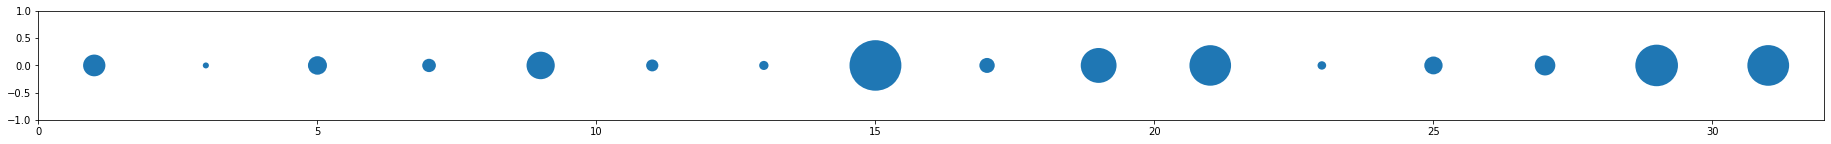

In [4]:
draw_circles(orig_hist)

Running `num_trials` times with the same parameters with the circuit above, but with random bit-flip error,
calculate the histogram and draw overlapped circles with some transparency.

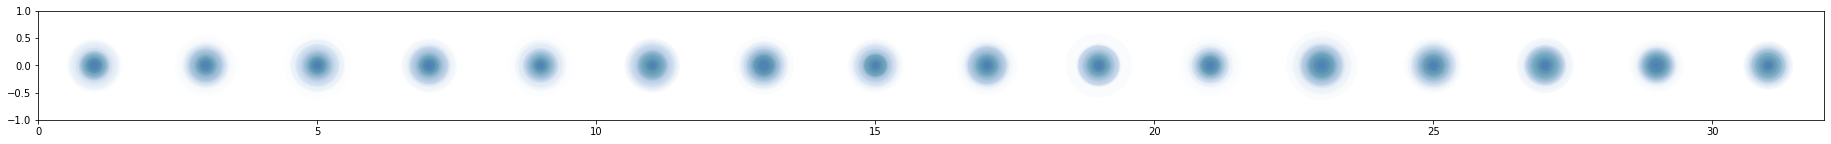

In [5]:
num_trials = 100
fig, ax = None, None
for _ in range(num_trials):
    noisy_result = run_random_circuit(N, D, shots,
                                      rand_x=True,
                                      in_r_param=r_params,
                                      in_m_param=m_params)
    noisy_hist = get_histogram_from_outcomes_small(noisy_result)
    fig, ax = draw_circles(noisy_hist, fig, ax, alpha=1/num_trials)
